# Correlating Stocks Using Heatmap

In [1]:
%pwd

'/home/gsandoval/Documents/Classes/depaul/ML_Programming/Project/MLProgramming/harry_folder'

In [2]:
 import numpy as np
 import pandas as pd
 import pandas_datareader as web
 from datetime import datetime
 import matplotlib.pyplot as plt
 import seaborn

In [11]:
# select start date for correlation window as well as list of tickers
start = datetime(2017, 1, 1)
symbols_list = ['SPY', 'XLB', 'XLC', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLRE', 'XLU', 'XLV', 'XLY']

In [12]:
#array to store prices
symbols=[]

In [13]:
#pull price using iex for each symbol in list defined above
for ticker in symbols_list: 
    r = web.DataReader(ticker, 'yahoo', start)
    # add a symbol column
    r['Symbol'] = ticker 
    symbols.append(r)

In [9]:
# concatenate into df
df = pd.concat(symbols)
df = df.reset_index()
df = df[['Date', 'Close', 'Symbol']]
df.head()

,Date,Close,Symbol
0,2017-01-03,225.240005,SPY
1,2017-01-04,226.580002,SPY
2,2017-01-05,226.399994,SPY
3,2017-01-06,227.210007,SPY
4,2017-01-09,226.460007,SPY


In [14]:
# pivot to have stocks represented as columns
df_pivot = df.pivot('Date','Symbol','Close').reset_index()
df_pivot.head()

ValueError: Index contains duplicate entries, cannot reshape

In [8]:
corr_df = df_pivot.corr(method='pearson')
corr_df.head().reset_index()
corr_df.head(10)

NameError: name 'df_pivot' is not defined

Visualize the results by plotting a heatmap of the correlations (with Seaborn and Matplotlib)

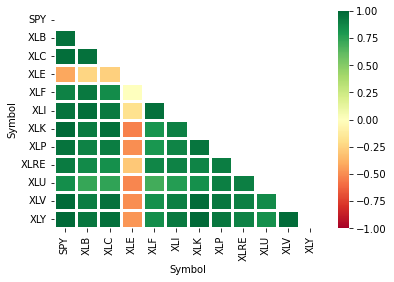

In [50]:
#take the bottom triangle since it repeats itself
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
#generate plot
seaborn.heatmap(corr_df, cmap='RdYlGn', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2.5)
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 
plt.show()

In [ ]:
SPY is higly correlated to the other ETFs, with XLE as an exception